In [1]:
import IPython.display as ipd
import os
import librosa
os.environ["CUDA_VISIBLE_DEVICES"] = ''
import glob
import time
import logging
import os
import glob
import dcase_util
import itertools
import numpy as np
import tensorflow as tf
from scipy import signal
# from utils.Params import Params
from os.path import normpath, basename
# from utils.PreProcess import linear2mu,  mu2linear
import matplotlib.pyplot as plt
# from utils.LoadData import  _parse_function, count_examples
import random
os.environ["CUDA_VISIBLE_DEVICES"] = ''


In [5]:
def count_examples(record_list):
    return sum([1 for record in record_list for _ in tf.python_io.tf_record_iterator(record)])

## Standard parsing function with all fields.

In [10]:
scenes=[
    "beach",
    "bus",
    "cafe_restaurant",
    "car",
    "city_center",
    "forest_path",
    "grocery_store",
    "home",
    "library",
    "metro_station",
    "office",
    "park",
    "residential_area",
    "train",
    "tram"
]
data_dir= "/home/ellen/RED/"
for scene in scenes:
    train_filenames = [f for f in glob.glob(data_dir+'data_binaries/train/*/{}/*.tfrecord'.format(scene)) if 'neg' in f]
    test_filenames = glob.glob(data_dir+'data_binaries/test/*/{}/*.tfrecord'.format(scene))
    val_neg_filenames = [f for f in glob.glob(data_dir+'data_binaries/val/*/{}/*.tfrecord'.format(scene)) if 'neg' in f]
    test_neg_filenames = [f for f in glob.glob(data_dir+'data_binaries/test/*/{}/*.tfrecord'.format(scene)) if 'neg' in f]
    test_pos_filenames = [f for f in glob.glob(data_dir+'data_binaries/test/*/{}/*.tfrecord'.format(scene)) if 'pos' in f]
    print('SCENE: {}'.format(scene))
    print('Number of training files for scene {}: {}'.format(scene, count_examples(train_filenames)))
    print('Number of val files for scene {}: {}'.format(scene, count_examples(val_neg_filenames)))

    print('Number of testing files for scene {}: {}'.format(scene, count_examples(test_filenames)))
    print('Number of testing negative files for scene {}: {}'.format(scene, count_examples(test_neg_filenames))) 
    print('Number of testing positive files for scene {}: {}'.format(scene, count_examples(test_pos_filenames)))
    print('Percentage negative: {0:.2f}%'.format((count_examples(test_pos_filenames)/count_examples(test_neg_filenames)*100)))

SCENE: beach
Number of training files for scene beach: 34768
Number of val files for scene beach: 35220
Number of testing files for scene beach: 37352
Number of testing negative files for scene beach: 36581
Number of testing positive files for scene beach: 771
Percentage negative: 2.11%
SCENE: bus
Number of training files for scene bus: 26482
Number of val files for scene bus: 28076
Number of testing files for scene bus: 33810
Number of testing negative files for scene bus: 33060
Number of testing positive files for scene bus: 750
Percentage negative: 2.27%
SCENE: cafe_restaurant
Number of training files for scene cafe_restaurant: 36097
Number of val files for scene cafe_restaurant: 32150
Number of testing files for scene cafe_restaurant: 30590
Number of testing negative files for scene cafe_restaurant: 29906
Number of testing positive files for scene cafe_restaurant: 684
Percentage negative: 2.29%
SCENE: car
Number of training files for scene car: 30303
Number of val files for scene c

In [44]:
def _parse_function(file):
    features = {
        'label': tf.FixedLenFeature([], tf.int64),
        'audio_inputs': tf.FixedLenFeature([], tf.string),
        'scene': tf.FixedLenFeature([], tf.string),
        'source_file': tf.FixedLenFeature([], tf.string)
    }
    parsed_features = tf.parse_single_example(file, features=features)
    label = tf.cast(parsed_features['label'], tf.int64)
    # Quanitised values in the range 0 to 255
    audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
    # The data is first scaled (between 0 and 2) by dividing by
    # 128, -1 then adjusts the range to values between -1 and 1.
    # tensorflow division: '[...] if one of x or y is a float, 
    # then the result will be a float.'
    # See: https://www.tensorflow.org/api_docs/python/tf/div
    audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
    scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
    source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
    return (audio_inputs, audio_quant), label


data_binaries_log = '/volumes/exSSD/RED_ARCHIVE/data_binaries/train/babycry/bus/'
filenames_neg = ['{}babycry_bus_neg.tfrecord'.format(data_binaries_log)]
filenames_pos = ['{}babycry_bus_pos.tfrecord'.format(data_binaries_log)]

filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_pos})
next_data, next_label= iterator.get_next()
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])

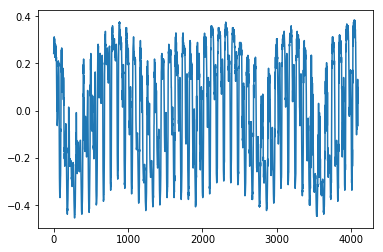

In [45]:
plt.plot(np.squeeze(data[0]))
plt.savefig('pos_example')

In [46]:
fs = 44100
ipd.Audio(np.squeeze(data[0]), rate=44100)

In [47]:
librosa.output.write_wav('pos_wave', np.squeeze(data[0]), fs)

In [50]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_data, next_label= iterator.get_next()
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])
data, label = sess.run([next_data, next_label])

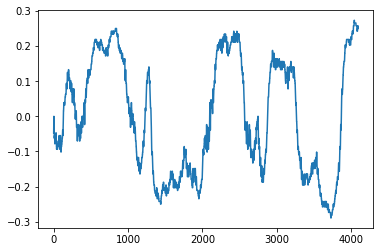

In [51]:
plt.plot(np.squeeze(data[0]))
plt.savefig('neg_example')

In [52]:
fs = 44100
ipd.Audio(np.squeeze(data[0]), rate=44100)

In [53]:
librosa.output.write_wav('neg_wave', np.squeeze(data[0]), fs)

### Negative example

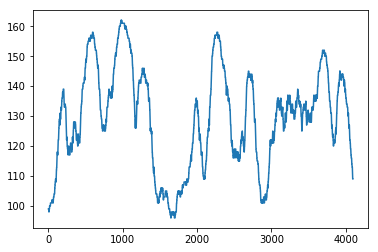

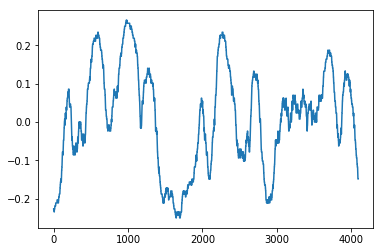

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_0
label 1/0 (positive/negative): [0]


In [6]:
plt.plot(data[0][0])
plt.show()
plt.plot(targets[0][0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0][0]
ipd.Audio(data[0][0], rate=fs)

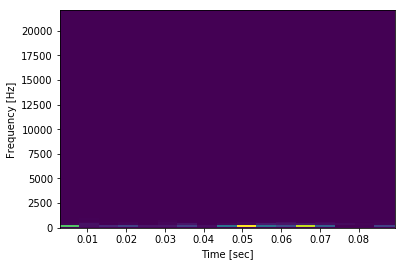

In [7]:
f, t, Sxx = signal.spectrogram(data[0][0], fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### Positive example

In [8]:
sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_pos})
next_batch_label, next_batch_data, next_batch_targets, scene, source_file = iterator.get_next()
label, data, targets, s, s_f = sess.run([next_batch_label, next_batch_data, next_batch_targets, scene, source_file])
label, data, targets, s, s_f = sess.run([next_batch_label, next_batch_data, next_batch_targets, scene, source_file])
label, data, targets, s, s_f = sess.run([next_batch_label, next_batch_data, next_batch_targets, scene, source_file])
label, data, targets, s, s_f = sess.run([next_batch_label, next_batch_data, next_batch_targets, scene, source_file])
label, data, targets, s, s_f = sess.run([next_batch_label, next_batch_data, next_batch_targets, scene, source_file])
label, data, targets, s, s_f = sess.run([next_batch_label, next_batch_data, next_batch_targets, scene, source_file])


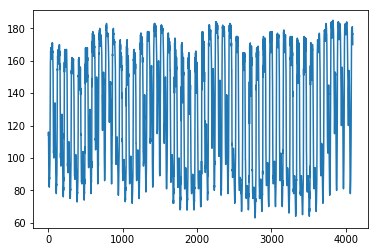

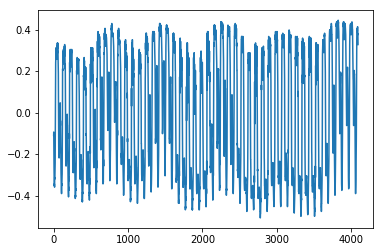

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): [1]


In [9]:
plt.plot(data[0][0])
plt.show()
plt.plot(targets[0][0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0][0]
ipd.Audio(data[0][0], rate=fs)

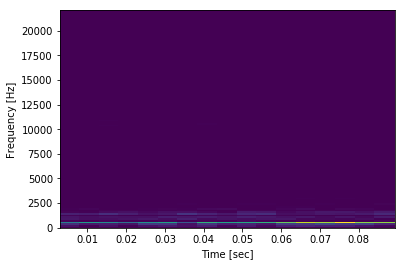

In [10]:
f, t, Sxx = signal.spectrogram(data[0][0], fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#### Check that this is what we expect (i.e. files have been written properly)

In [76]:
f='data/TUT-rare-sound-events-2017-development/data/mixture_data/devtrain/20b255387a2d0cddc0a3dff5014875e7/audio/mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2.wav' 
# ipd.Audio(f)
audio = dcase_util.containers.AudioContainer().load( filename=f, mono=True)

segment_length = 0.1
fs = 44100
# Float, needs to be converted to an int. 
duration_in_secs = int(audio.duration_sec)

# segment_meta is a MetaDataContainer
# Parameter exists to skip segments: https://dcase-repo.github.io/dcase_util/tutorial_audio.html
data, segment_meta = audio.segments(segment_length_seconds=segment_length)
# ipd.Audio(data[14], rate=fs)

data_quantised = linear2mu(data[5])
ipd.Audio(data_quantised, rate=fs)

### CAE parsing function
Should just be inputs between -1 and 1

In [77]:
def _cae_parse_function(file):
	features = {
		'label': tf.FixedLenFeature([], tf.int64),
		'audio_inputs': tf.FixedLenFeature([], tf.string),
		'scene': tf.FixedLenFeature([], tf.string),
		'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = [] # No labels being passed in training, just a placeholder.
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Range between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	return audio_inputs, label

In [78]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_cae_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_batch_data, next_batch_targets= iterator.get_next()
data, label = sess.run([next_batch_data, next_batch_targets])

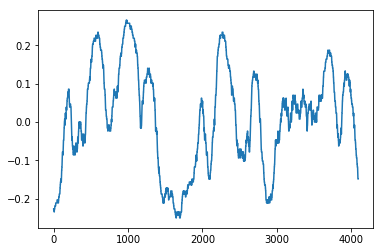

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): []


In [79]:
plt.plot(data[0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0]
ipd.Audio(data[0], rate=fs)

In [80]:
def _cae_test_parse_function(file):
	features = {
		'label': tf.FixedLenFeature([], tf.int64),
		'audio_inputs': tf.FixedLenFeature([], tf.string),
		'scene': tf.FixedLenFeature([], tf.string),
		'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = tf.cast(parsed_features['label'], tf.int64)
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Range between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	return audio_inputs, label

In [81]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_cae_test_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_batch_data, next_batch_targets= iterator.get_next()
data, label = sess.run([next_batch_data, next_batch_targets])

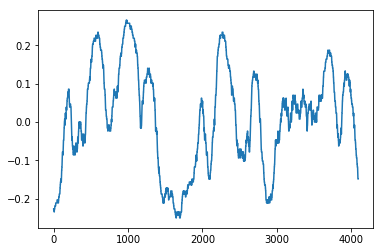

LABEL [[[-0.109375 -0.09375  -0.125    ...  0.375     0.34375   0.328125]]]
Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): 0


In [82]:
plt.plot(data[0])
plt.show()
print('LABEL', targets)
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0]
ipd.Audio(data[0], rate=fs)

### WaveNet parsing function
- Input should be between -1 and 1
- Output should be between 0 and 255

In [83]:
def _wavenet_parse_function(file):
	features = {
	    'label': tf.FixedLenFeature([], tf.int64),
	    'audio_inputs': tf.FixedLenFeature([], tf.string),
	    'scene': tf.FixedLenFeature([], tf.string),
	    'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = []
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	return (audio_inputs, audio_quant), label

In [84]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_wavenet_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_batch_data, next_batch_targets= iterator.get_next()
data, label = sess.run([next_batch_data, next_batch_targets])

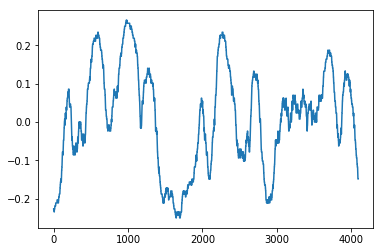

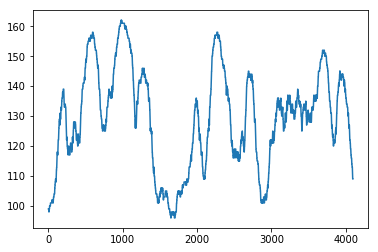

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): []


In [85]:
plt.plot(data[0][0])
plt.show()
plt.plot(data[1][0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0]
ipd.Audio(data[0], rate=fs)

### Parsing function for conditioned WaveNet
- Input 1 should be input of conditioning section of network between -1 and 1. 

- Input 2 should be input of current example between -1 and 1. 

- Output should be current example between 0 and 255. 

In [86]:
def _wavenet_test_parse_function(file):
	features = {
	    'label': tf.FixedLenFeature([], tf.int64),
	    'audio_inputs': tf.FixedLenFeature([], tf.string),
	    'scene': tf.FixedLenFeature([], tf.string),
	    'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = tf.cast(parsed_features['label'], tf.int64)
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	return (audio_inputs, audio_quant), label



In [87]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_wavenet_test_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_batch_data, next_batch_targets= iterator.get_next()
data, label = sess.run([next_batch_data, next_batch_targets])

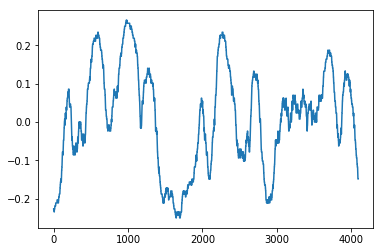

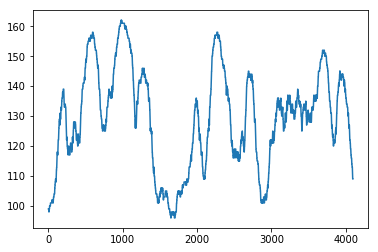

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): 0


In [88]:
plt.plot(data[0][0])
plt.show()
plt.plot(data[1][0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0]
ipd.Audio(data[0], rate=fs)

In [89]:
def _wavenetcond_parse_function(file):
	features = {
		'label': tf.FixedLenFeature([], tf.int64),
		'audio_inputs': tf.FixedLenFeature([], tf.string),
		'scene': tf.FixedLenFeature([], tf.string),
		'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = [] # No labels being passed in training, just a placeholder.
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	# There can only be one input so they need to be in a list
	return (audio_inputs, audio_inputs, audio_quant), label

In [90]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_wavenetcond_parse_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_batch_data, next_batch_targets= iterator.get_next()
data, label = sess.run([next_batch_data, next_batch_targets])

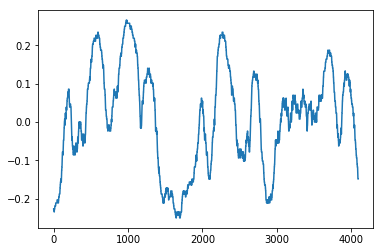

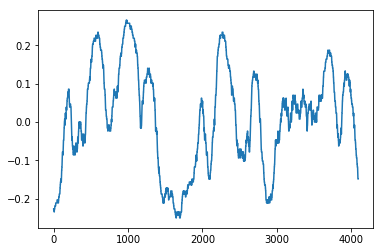

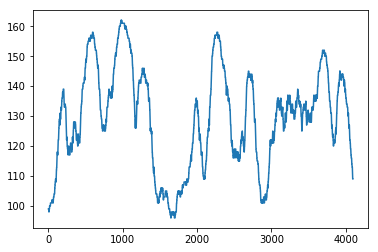

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): []


In [91]:
plt.plot(data[0][0])
plt.show()
plt.plot(data[1][0])
plt.show()
plt.plot(data[2][0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0]
ipd.Audio(data[0], rate=fs)

In [92]:
def _wavenetcond_parse_test_function(file):
	features = {
		'label': tf.FixedLenFeature([], tf.int64),
		'audio_inputs': tf.FixedLenFeature([], tf.string),
		'scene': tf.FixedLenFeature([], tf.string),
		'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = tf.cast(parsed_features['label'], tf.int64)
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	# There can only be one input so they need to be in a list
	return (audio_inputs, audio_inputs, audio_quant), label

In [93]:
filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_wavenetcond_parse_test_function)
# dataset = dataset.repeat()
dataset = dataset.batch(1)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
next_batch_data, next_batch_targets= iterator.get_next()
data, label = sess.run([next_batch_data, next_batch_targets])

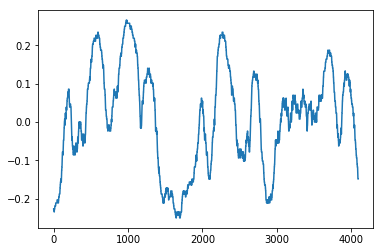

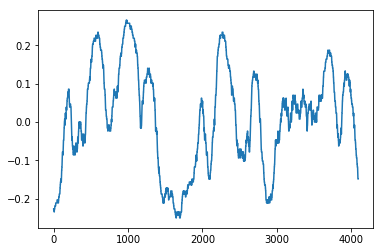

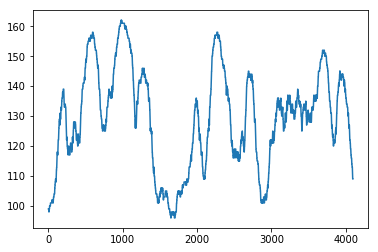

Scene: bus
File name, segment:  mixture_devtrain_babycry_023_05c4cff75186054af7fbb4c6623d19d2_6
label 1/0 (positive/negative): 0


In [94]:
plt.plot(data[0][0])
plt.show()
plt.plot(data[1][0])
plt.show()
plt.plot(data[2][0])
plt.show()
print('Scene:', bytes(s[0]).decode('utf8'))
print('File name, segment: ', bytes(s_f[0]).decode('utf8'))
print('label 1/0 (positive/negative):', label[0])
fs=44100
data_input = data[0]
ipd.Audio(data[0], rate=fs)

### How uneven batches are handled
#### The last batch is just uneven, see below :) 

In [11]:
def _cae_parse_function(file):
	features = {
		'label': tf.FixedLenFeature([], tf.int64),
		'audio_inputs': tf.FixedLenFeature([], tf.string),
		'scene': tf.FixedLenFeature([], tf.string),
		'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = [] # No labels being passed in training, just a placeholder.
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Range between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	return audio_inputs,  label

data_binaries_log = 'data_binaries/train/babycry/bus/'
filenames_neg = ['{}babycry_bus_neg.tfrecord'.format(data_binaries_log)]
filenames_pos = ['{}babycry_bus_pos.tfrecord'.format(data_binaries_log)]

batch_size = 32
print(num_examples)
print("Number of batches per epoch:", num_examples/batch_size)

filenames_pl = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames_pl)
dataset = dataset.map(_cae_parse_function)
dataset = dataset.batch(batch_size)
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()
iter_init = iterator.initializer
next_batch_data, next_batch_label = iterator.get_next()

sess = tf.Session()
sess.run(iter_init, feed_dict={filenames_pl: filenames_neg})
c = 0
while True:
    try:
        label, data= sess.run([next_batch_label, next_batch_data])
        c+=1
    except tf.errors.OutOfRangeError:
        break
print('Number of batches processed:', c)
print('Shape of last batch: ', label.shape[0])

8338
Number of batches per epoch: 260.5625
Number of batches processed: 261
Shape of last batch:  18


### Check shuffle

In [21]:
def _cae_parse_function(file):
	features = {
		'label': tf.FixedLenFeature([], tf.int64),
		'audio_inputs': tf.FixedLenFeature([], tf.string),
		'scene': tf.FixedLenFeature([], tf.string),
		'source_file': tf.FixedLenFeature([], tf.string)
	}
	parsed_features = tf.parse_single_example(file, features=features)
	label = tf.cast(parsed_features['label'], tf.int64) # No labels being passed in training, just a placeholder.
	# Quanitised value
	audio_quant = tf.decode_raw(parsed_features['audio_inputs'], tf.int64)
	# Range between -1 and 1
	audio_inputs = tf.cast(audio_quant, dtype=tf.float32)/128 - 1
	scene = tf.decode_raw(parsed_features['scene'], tf.uint8)
	source_file = tf.decode_raw(parsed_features['source_file'], tf.uint8)
	return audio_inputs,  label

data_binaries_log = 'data_binaries/train/babycry/bus/'
filenames_neg = ['{}babycry_bus_neg.tfrecord'.format(data_binaries_log),
                '{}babycry_bus_pos.tfrecord'.format(data_binaries_log)]
filenames_pos = glob.glob('data_binaries/val/babycry/beach/*.tfrecord')
batch_size = 32
num_examples = count_examples(filenames_pos)
print("Number of batches per epoch:", num_examples/batch_size)
dataset = tf.data.TFRecordDataset(filenames_pos)
# dataset = dataset.shuffle(num_examples)
dataset = dataset.map(_cae_parse_function)
dataset = dataset.batch(batch_size)
iterator = dataset.make_initializable_iterator()
iter_init = iterator.initializer
next_batch_data, next_batch_label = iterator.get_next()

sess = tf.Session()
sess.run(iter_init)
c = 0
collect_labels = []
while True:
    try:
        data, label = sess.run([next_batch_data, next_batch_label])
        c+=1
        collect_labels.append(label)
    except tf.errors.OutOfRangeError:
        break
print(collect_labels)

Number of batches per epoch: 362.25
[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Number of examples in each set. 

In [95]:
# Ref: fhttps://stackoverflow.com/questions/40472139/obtaining-total-number-of-records-from-tfrecords-file-in-tensorflow
num_neg = sum([1 for record in filenames_neg for _ in tf.python_io.tf_record_iterator(record)])

In [96]:
num_pos =sum([1 for record in filenames_pos for _ in tf.python_io.tf_record_iterator(record)])

In [97]:
print('Number of negative examples: {}'.format(num_neg))
print('Number of positive examples: {}'.format(num_pos))
print('percentage of positive examples: {:.2f}%'.format((num_pos/num_neg)*100))

Number of negative examples: 8338
Number of positive examples: 356
percentage if positive examples: 4.27%
